In [1]:
import pandas as pd
import numpy as np
import re
import requests
from collections import Counter
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Return a pandas dataframe containing the data set.
# Specify a 'latin-1' encoding when reading the data.
# data_file will be populated with the string 'wholesale_customers.csv'.

def read_csv_3(data_file):
    df = pd.read_csv(data_file, encoding='latin-1')
    
    return df

In [3]:
# Return a list with the possible sentiments that a tweet might have.

def get_sentiments(df):
    return df['Sentiment'].unique().tolist()

In [4]:
# Return a string containing the second most popular sentiment among the tweets.

def second_most_popular_sentiment(df):
    sentiment_counts = df['Sentiment'].value_counts()
    return sentiment_counts.index[1]

In [5]:
# Return the date (string as it appears in the data) with the greatest number of extremely positive tweets.

def date_most_popular_tweets(df):
    extremely_positive = df[df['Sentiment'] == 'Extremely Positive']
    date_counts = extremely_positive['TweetAt'].value_counts()
    return date_counts.index[0]

In [6]:
# Modify the dataframe df by converting all tweets to lower case.

def lower_case(df):
    df['OriginalTweet'] = df['OriginalTweet'].str.lower()

In [7]:
# Modify the dataframe df by replacing each characters which is not alphabetic or whitespace with a whitespace.

def remove_non_alphabetic_chars(df):
    df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub('[^a-z\s]', ' ', x))

In [8]:
def remove_urls(df):
    def remove_url_from_text(text):
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'www\S+', '', text)
        text = re.sub(r'pic.twitter.com\S+', '', text)
        text = re.sub(r't\.co\S+', '', text)
        return text

    df['OriginalTweet'] = df['OriginalTweet'].apply(remove_url_from_text)

In [9]:
# Modify the dataframe df with tweets after removing characters which are not alphabetic or whitespaces.

def remove_multiple_consecutive_whitespaces(df):
    df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(' +', ' ', x))


In [10]:
# Given a dataframe where each tweet is one string with words separated by single whitespaces,
# tokenize every tweet by converting it into a list of words (strings).

def tokenize(df):
    column_names = df.columns
    tdf = df.copy()
    pd.DataFrame(tdf,columns=column_names)
    
    tdf['OriginalTweet'] = tdf['OriginalTweet'].apply(lambda x: x.split())
    
    return tdf
    

In [11]:
# Given dataframe tdf with the tweets tokenized, return the number of words in all tweets including repetitions.

def count_words_with_repetitions(tdf):
    return sum(tdf['OriginalTweet'].apply(len))

In [12]:
# Given dataframe tdf with the tweets tokenized, return the number of distinct words in all tweets.

def count_words_without_repetitions(tdf):
    return len(set(word for tweet in tdf['OriginalTweet'] for word in tweet))

In [13]:
# Given dataframe tdf with the tweets tokenized, return a list with the k distinct words that are most frequent in the tweets.

def frequent_words(tdf, k):
    word_counts = Counter(word for tweet in tdf['OriginalTweet'] for word in tweet)
    return [word for word, _ in word_counts.most_common(k)]

In [14]:
# Given dataframe tdf with the tweets tokenized, remove stop words and words with <=2 characters from each tweet.
# The function should download the list of stop words via:
# https://raw.githubusercontent.com/fozziethebeat/S-Space/master/data/english-stop-words-large.txt

def remove_stop_words(tdf):
    url = 'https://raw.githubusercontent.com/fozziethebeat/S-Space/master/data/english-stop-words-large.txt'
    stop_words = set(requests.get(url).text.split())
    tdf['OriginalTweet'] = tdf['OriginalTweet'].apply(lambda x: [word for word in x if word not in stop_words and len(word) > 2])


In [15]:
# Given dataframe tdf with the tweets tokenized, reduce each word in every tweet to its stem.

def stemming(tdf):
    ps = PorterStemmer()
    tdf['OriginalTweet'] = tdf['OriginalTweet'].apply(lambda x: [ps.stem(word) for word in x])

In [22]:
# Given a pandas dataframe df with the original coronavirus_tweets.csv data set,
# build a Multinomial Naive Bayes classifier. 
# Return predicted sentiments (e.g. 'Neutral', 'Positive') for the training set
# as a 1d array (numpy.ndarray). 

def mnb_predict(df):
    
    lower_case(df)
    remove_non_alphabetic_chars(df)
    remove_urls(df)
    remove_non_alphabetic_chars(df)
    remove_multiple_consecutive_whitespaces(df)
    
    # Tokenize 
    
    tdf = tokenize(df)
    remove_stop_words(tdf)
    stemming(tdf)
    
    
    count_vectorizer = CountVectorizer(max_features=90000, ngram_range=(1, 2), stop_words='english')
    X = count_vectorizer.fit_transform(tdf['OriginalTweet'].apply(lambda x: ' '.join(x)))
    y = tdf['Sentiment'].values
    clf = MultinomialNB()
    clf.fit(X, y)
    preds = clf.predict(X)
    
    return preds,y 

In [23]:

# Given a 1d array (numpy.ndarray) y_pred with predicted labels (e.g. 'Neutral', 'Positive') 
# by a classifier and another 1d array y_true with the true labels, 
# return the classification accuracy rounded in the 3rd decimal digit.

def mnb_accuracy(y_true, y_pred):
    return round(accuracy_score(y_true, y_pred), 4)

In [24]:
df = read_csv_3("coronavirus_tweets.csv")
preds, y = mnb_predict(df)

In [25]:
# Calculate the training accuracy
train_accuracy = mnb_accuracy(y, preds)
print(f"Training accuracy: {train_accuracy}")

Training accuracy: 0.8213


### Aditional 

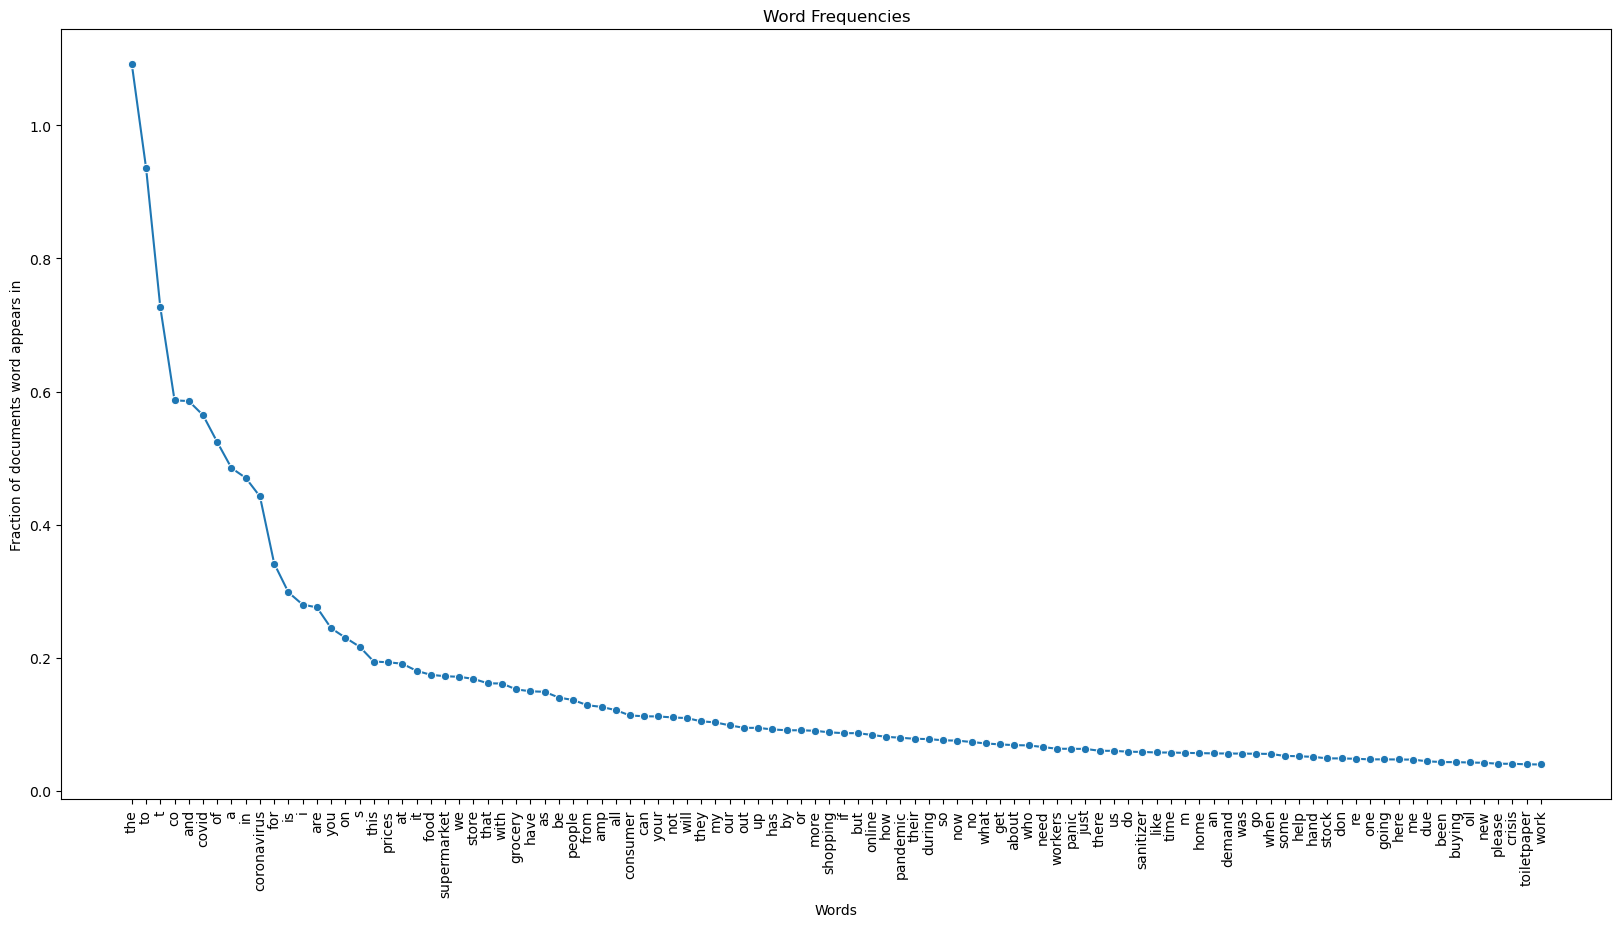

In [27]:
df = read_csv_3("coronavirus_tweets.csv")
lower_case(df)
remove_non_alphabetic_chars(df)
remove_urls(df)
remove_non_alphabetic_chars(df)
remove_multiple_consecutive_whitespaces(df)
    
# Tokenize 
    
tdf = tokenize(df)


# Calculate word frequencies
word_counts = Counter(word for tweet in tdf['OriginalTweet'] for word in tweet)
total_documents = len(tdf)
word_frequencies = {word: count / total_documents for word, count in word_counts.items()}

# Sort words by frequency and select the top N words to plot
N = 100
sorted_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:N]

# Create lists for words and frequencies
words = [word for word, freq in sorted_words]
frequencies = [freq for word, freq in sorted_words]

# Plot line chart
plt.figure(figsize=(20, 10))
sns.lineplot(x=words, y=frequencies, marker="o")
plt.xlabel('Words')
plt.ylabel('Fraction of documents word appears in')
plt.title('Word Frequencies')
plt.xticks(rotation=90)
plt.show()